In [10]:
%matplotlib inline
import pymc as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
az.style.use('arviz-darkgrid')
np.random.seed(44)


In [11]:
import seaborn as sns
sns.set_theme()
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    "figure.figsize": [7, 3],
    'figure.facecolor': '#fffff8',
    'axes.facecolor': '#fffff8',
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0, 
})
sns.set(rc={'figure.figsize':(7,3)})

# Linear regression


Giorgio Corani <br/>


*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Based on.. 


*   Chapter 3 of O. Martin, *Bayesian Analysis with Python, Second Edition*.


* Chapter 8 of *the Bayes rule book* https://www.bayesrulesbook.com/chapter-10.html


*  Notebook by G. Corani

# Linear regression

* We want to predict the value of $Y$ given the observation of $X$.


* $X$ and $Y$ are random variables:
    *  $Y$ is the *dependent* (or  *response*) variable
    *  $X$  is the *independent*  variable   (or *explanatory variable*   or *covariate*)

# Simple linear regression: a single explanatory variable

$$Y = \alpha +  \beta X  + \epsilon$$


* $\alpha$  (*intercept*):  predicted value of $Y$ for $X$ = 0; can be   seen as  a constant which calibrates the shift along the y-axis.


* $\beta$ (*slope*):  predicted change in $Y$  for a unit change in  $X$. 


* $\epsilon$ is a noise which the  scatters the  observations  around the line. 

# Simple linear regression

<img src='img/linreg.png' width=600 align="center" > 


*  The noise  $\epsilon$ implies a deviation from the  linear model. It captures anything that may affect $Y$ other than $X$.

* We assume  $\epsilon \sim N(0, \sigma^2)$.

# The effect of $\sigma$


<img src='img/sigma-effect.png' width=700 align="center" > 

* $\sigma$ is the std dev of the  noise $\epsilon$.

* Large $\sigma$: large variability of the observations around the linear model, weak relationship. 

* Small $\sigma$: the observations deviates  little from the  model; strong relationship.

# The effect of $\sigma$


<img src='img/sigma-effect.png' width=700 align="center" > 


* Under the normal assumption,  about 95% of the observations  lie  in an interval of $\pm 2 \sigma$ around the regression line.



# Multiple linear regression

* Linear regression with $k$ explanatory variables:

\begin{align}
 Y = \alpha+ \sum_i β_i X_i +ε,
\end{align}


* The coefficients $\beta_1,…,\beta_k$ measure the effect of each predictor after taking into account the effects of all the other predictors in the model.


* They measure the *marginal effects* of each  explanatory variable.

# Probabilistic regression

* Accounts for the uncertainty in the estimation of the parameters ($\alpha, \beta, \sigma$)


*  Possibility of adopting a   *robust regression* to deal with outliers.
    

* Hierarchical regression: learning related regression models for different sources of data e.g.,  different hospitals applying the same treatment.


# Probabilistic  regression


\begin{align*}
Y &\sim N (\mu=\alpha + X \beta,  \sigma) \\
\end{align*}


*  We must specify a prior distribution for each of  parameter: $\alpha$, $\beta$, $\sigma$.

# Probabilistic  regression

* We  independently specify the prior of each parameter. 


* Ideally, we define the priors based on background information


* If this is not possible, we adopt  priors which are based on the  data (data-dependent priors). These are broad priors (*weakly informative*) priors, which define the order of magnitude of the parameters.
    

# Using background information 

Define  a regression model for a bike sharing company, based on:


*    For every one degree increase in temperature, rides  increases by about 100 rides; the average increase is between  20 and 180.


*    On an average temperature day (65 - 70 degrees), there are around 5000 riders, though this varies between 3000 and 7000.


*    At any given temperature, daily ridership varies with a moderate standard deviation of 1250 rides.

  


# Prior for the slope $\beta$


> For every one degree increase in temperature, ridership typically increases by 100 rides; the average increase is between  20 and 180.

$$ \beta  \sim N(100, 40)  $$



# Prior for the intercept $\alpha$


>  On an average temperature day, there are around 5000 riders, though this  could vary between 3000 and 7000.
   
* We have no  information about the intercept  (average number of rides when the temperature is 0).


* We know instead  the usual number of rides for  an average value of temperature.


*  To use this information, we define the  *centered variable*  $X_c = X - \bar{x}$

# Regression with centered data
   
\begin{align*}
Y & = \alpha + \beta X  \\
Y & = \alpha + \beta \underbrace{(X - \bar{x})}_{X_c} + \beta \bar{x}   \\
Y & = \alpha + \beta X_c + \beta \bar{x}   \\
Y & =  \underbrace{\alpha +  \beta \bar{x}}_{\alpha_c} + \beta X_c   \\
Y & = \alpha_c + \beta X_c    \\
\end{align*}

# Interpretation of parameters with centered data
   
\begin{align*}
Y & =  \underbrace{\alpha +  \beta \bar{x}}_{\alpha_c} + \beta X_c   \\
Y & = \alpha_c + \beta X_c    \\
\end{align*}


* The *centered intercept* $\alpha_c =  \alpha +  \beta \bar{x}$ represents the expected value of $Y$ when $X = \bar{x}$, i.e,  when $X_c$ equals 0. 

* Thus $\alpha_c$ is the typical value of $Y$ when $X$ is at its mean.

* The meaning of $\beta$ is the usual one (slope) .

* The model has to be fit using $X_c$ instead of $X$.

# Centering is anyway a good thing to do

* Centering each covariate  is in general a good thing to do, to numerically help the sampling.



* Sampling the posterior of the regression model on non-center data might be slow and problematic (e.g., low  ess).

# Prior for $\alpha_c$


>  On an average temperature day (65 - 70 degrees), there are around 5000 riders, though this  could vary between 3000 and 7000.
   

* $\alpha_c \sim N(5000, 1000)$.






In [12]:
# Prior for sigma

# > At any given temperature, daily ridership will tend to vary with a moderate standard deviation of 1250 rides.

# We can  set:
# sigma ~  HalfNormal (1850), as the median of this distribution is around 1250.

from scipy.stats import halfnorm 
pd.DataFrame(halfnorm.rvs(scale=1850, size=10000)).describe()

,0
count,10000.000000
mean,1485.546268
std,1118.971490
min,0.307154
25%,604.873887
50%,1258.085145
75%,2128.698084
max,7078.218157


# The resulting model: bike rides as a function of temperature


\begin{align*}
\alpha_c & \sim  N (5000, 1000) \\
\beta & \sim N(100, 40) \\
\sigma & \sim \text{HalfNormal} (1850)\\ 
Y & \sim N( \alpha_c + \beta X_c, \sigma)
\end{align*}


* To  fit the model it is necessary to use the centered covariate $X_c = X - \bar{x}$, where  $\bar{x}$ is the sample mean.

# Your turn: define a model of probabilistic regression 


*    Ridership tends to decrease as humidity increases: for every one percentage point increase in humidity level, ridership tends to decrease by 10 rides, though the decrease could vary between 0 and 20.


*    On an average humidity day, there are typically around 5000 riders, the actual number varying between 1000 and 9000.


 *  Ridership is only weakly related to humidity. At any given humidity, ridership will tend to vary with a large standard deviation of 2000 rides.

# Comprehension question

* Why is a Normal prior a reasonable choice for $\alpha$ and $\beta$ ?
* Why isn’t a Normal prior a reasonable choice for $\sigma$ ?

# If background information is not available

* Sometimes no background information is available.


* We use in this case priors based on the scale of the data (*data-dependent* priors). These are broad priors  which provides  information about the order of magnitude of the variables., and which   anyway  improve  the fitting of the model compared to uniformative flat priors.


* See for https://cran.r-project.org/web/packages/rstanarm/vignettes/priors.html for more details.


# Recommended priors in case of no background knowledge

*  $\alpha \sim N(\bar{y}, 2 s_y )$:
    * $\bar{y}$ are the  mean and  the standard deviation of  $Y$ in the sample.
    * the same  prior can be used also for $\alpha_c$


* $\beta \sim N(0, 2.5 \frac{s_y}{s_x})$
    * a priori the relation has equal probability of being increasing or decreasing
    * the prior is broad (in simple linear regression  $\hat{\beta} = R \frac{s_y}{s_x}$)



*  $\sigma \sim HN (1.5 s_y)$





# Priors

* We assume independence of the parameters.


* In any case, the  joint prior  of the parameters is thus the product of their marginal pdfs:

\begin{align}
f(\alpha,\beta,\sigma)=f(\alpha)f(\beta)f(\sigma)
\end{align}

# Likelihood  


* It is the probability of observing our data $\mathbf{y}$ given a specific value of the parameters $\alpha,\beta,\sigma$


* Assuming   independence of the observations, we multiply the normal density of each observation:

$$ f(\mathbf{y}|\alpha,\beta,\sigma)=∏_{i=1}^n N( y_i|  \alpha + \beta x_i, \sigma) $$

# Your turn

* Given $\alpha$=2, $\beta=10$, $\sigma$=1

* Consider the observations: 

|$X$|$Y$|
|:---:|:---:|       
| 1 | 11 |
| 5 | 50 |


* Compute the likelihood function.

# Posterior

Thus, building the posterior distribution  would require us to compute the three-dimensional  posterior pdf:

\begin{align}
\underbrace{
f ( (\alpha,\beta,\sigma)| \mathbf{y})  
}_{\text{posterior}}
\propto \text{prior} \cdot \text{likelihood} & =
f(\alpha)f(\beta)f(\sigma) \left[ ∏_i^n f(y_i|\alpha,\beta,\sigma) \right] 
\end{align}

* That is, evaluating the prior and  likelihood for each possible value of the parameters. We will do this using Pymc3.

# Linear regression in PyMC3

In [13]:
#load and check the data
#500 rows of data
bike_data = pd.read_csv('data/bikes.csv')
rides = bike_data["rides"]
temperature = bike_data["temp_actual"]

bike_data

,date,season,year,month,day_of_week,weekend,holiday,temp_actual,temp_feel,humidity,windspeed,weather_cat,rides
0,2011-01-01,winter,2011,Jan,Sat,True,no,57.399525,64.72625,80.5833,10.749882,categ2,654
1,2011-01-03,winter,2011,Jan,Mon,False,no,46.491663,49.04645,43.7273,16.636703,categ1,1229
2,2011-01-04,winter,2011,Jan,Tue,False,no,46.760000,51.09098,59.0435,10.739832,categ1,1454
3,2011-01-05,winter,2011,Jan,Wed,False,no,48.749427,52.63430,43.6957,12.522300,categ1,1518
4,2011-01-07,winter,2011,Jan,Fri,False,no,46.503324,50.79551,49.8696,11.304642,categ2,1362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2012-12-27,winter,2012,Dec,Thu,False,no,50.757525,52.39778,65.2917,23.458911,categ2,1867
496,2012-12-28,winter,2012,Dec,Fri,False,no,50.695975,54.95414,59.0000,10.416557,categ2,2451
497,2012-12-29,winter,2012,Dec,Sat,True,no,50.695975,53.81600,75.2917,8.333661,categ2,1182
498,2012-12-30,winter,2012,Dec,Sun,True,no,50.880475,52.85300,48.3333,23.500518,categ1,1432


In [14]:
#centered covariate
temperature_c = temperature - temperature.mean()

with pm.Model() as reg_model:
    alpha_c  = pm.Normal ('alpha_c', mu=5000,  sigma= 1000)
    beta     = pm.Normal ('beta',   mu=100,     sigma= 40)
    sigma    = pm.HalfNormal ('sigma', sigma=1850 )
        
    y_pred = pm.Normal('y_pred', mu=alpha_c + beta * temperature_c, sigma=sigma, observed=rides)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_c, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


In [15]:
#posterior values are reasonably close to our prior guess. Prior information was reliable.
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_c,3487.006,56.678,3382.321,3590.973,0.723,0.511,6136.0,3241.0,1.0
beta,89.406,5.582,78.850,99.598,0.070,0.050,6369.0,3115.0,1.0
sigma,1291.295,41.243,1216.705,1370.282,0.489,0.347,7124.0,2564.0,1.0


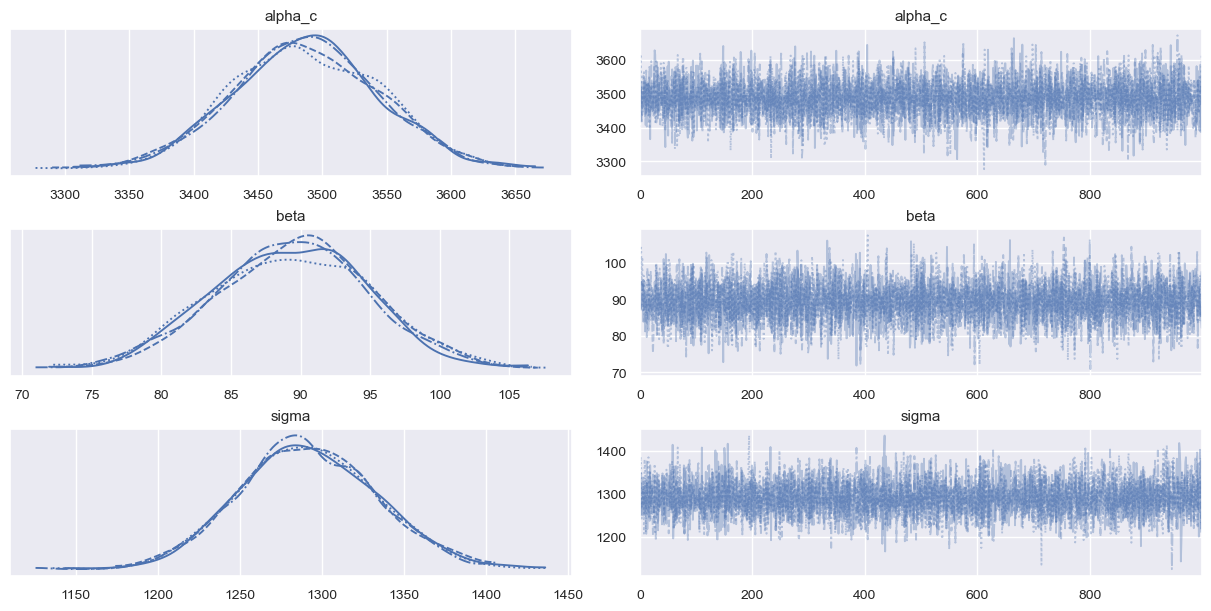

In [16]:
az.plot_trace(trace);

# Visualizing the model

* Each sample $<\alpha_s,\beta_s>$ yields a plausible line.

*  We can visualize the average line is obtained by using the posterior mean of $\alpha_c$ and $\beta$:

\begin{align}
\hat{\alpha}_c & =  \frac{1}{S} \sum_s \alpha_{c_s} \\
\hat{\beta} & = \frac{1}{S} \sum_s \beta_s \\
\end{align}

* We are using the hat to denote the posterior means, obtained by averaring over  the samples of the trace.


In [33]:
# Extracting the posterior mean of the parameters

# to work with samples, we first  extract the dataset of samples.
idata = az.extract_dataset(trace)

#idata.alpha_c.values access the samples of alpha_c, etc
alpha_c_hat =  idata.alpha_c.values.mean() #3486
beta_hat    =  idata.beta.values.mean() # 89.5


# The posterior mean relation is thus:  y (rides) = 3486 + 89.5 * temperature_c

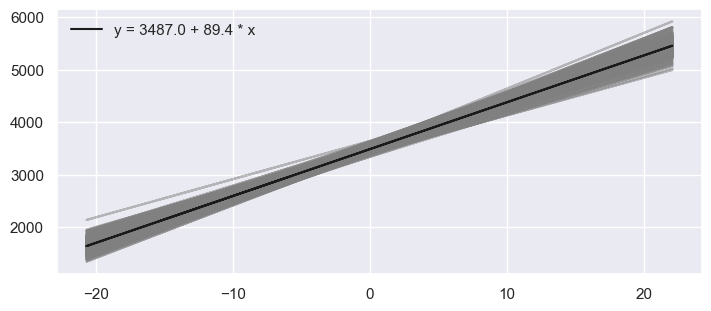

In [42]:
#We plot the average line (based on the posterior mean of alpha_c and beta) and  other plausible lines 
#using the sampled values of alpha_c and beta.
#To quickly compute the plot, we pick one sample every 10.

chosen_samples = range(0, len(idata.alpha_c.values),10)

#The uncertainty is shown by plotting a different line for each sample of (alpha_c, beta).
for i in range(len(chosen_samples)):
    plt.plot(temperature_c,  idata.alpha_c.values[i] + idata.beta.values[i] * temperature_c, c='gray', alpha=0.5)

#Mean value of the regression line
alpha_hat =  idata.alpha_c.values.mean()
beta_hat   =  idata.beta.values.mean()
plt.plot(temperature_c, alpha_c_hat + beta_hat * temperature_c, c='k',label='y = {:.1f} + {:.1f} * x'.format(alpha_hat, beta_hat))
plt.legend();

#  Evaluating the  association between $X$ and $Y$

* We have large evidence of positive association between $x$ and $y$, i.e., that $\beta$>0:
    * in our visual examination of the posterior plausible scenarios, all exhibited positive associations.

In [43]:
#  Evaluating the positive association between $x$ and $y$
# the 95% HDI of $\beta$  is about 80-100 and  contains only positive values.
# We reject the hypothesis of beta being 0.
az.summary(trace, var_names="beta")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,89.406,5.582,78.85,99.598,0.07,0.05,6369.0,3115.0,1.0


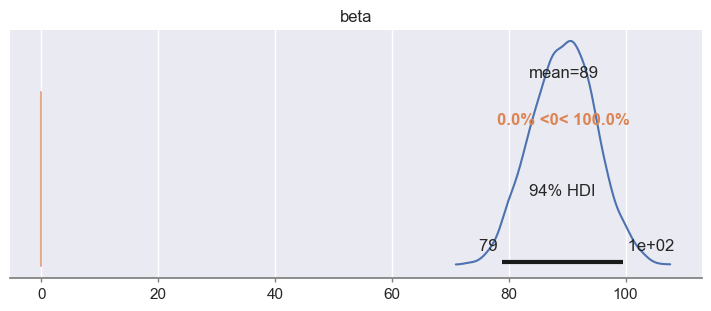

In [44]:
az.plot_posterior(trace, var_names="beta", ref_val=0);

# Making predictions

*  We denote by $x^*$ denotes a value of $x$ for which a prediction is required.


*  Predict the number of rides  for the a temperature of $x^*$=66 F.


* First, we center the value: $x_c^* = 66 - \bar{x} = 66 - 63.3 = 2.7$ 

# Making predictions

* A simple way to make predictions is to use the posterior mean of the parameters:
$$ \hat{y}_{new} = \hat{\alpha}_c + \hat{\beta} x^*= 3486 + 89.5 \cdot 2.7 = 3727.6 $$


This ignores two sources of variability:
   * the effect of the noise $\epsilon$
   * the uncertainty about the value of the  parameters 

# Posterior predictive distribution
For each parameter sample $<\alpha_{s}, \beta_s, \sigma_s>$, draw a prediction as:
$$y_{s}^* \sim N(\alpha_{s} + \beta_s x^*,  \sigma_s)$$

$$
\left[
\begin{array}{lll} 
\alpha_1 & \beta_1 & \sigma_1 \\
\alpha_2 & \beta_2 & \sigma_2 \\
\vdots & \vdots & \vdots \\
\alpha_{4000} & \beta_{4000} & \sigma_{4000} \\
\end{array}
\right]
\;\; \longrightarrow \;\;
\left[
\begin{array}{l} 
y_1^{*} \\
y_2^{*} \\
\vdots \\
y_{4000}^{*} \\
\end{array}
\right]
$$


In [46]:
#centered value of x_test
x_test = 2.7

post = az.extract_dataset(trace)

#samples of the different variables. The vector of samples are shown with the underscore _s
sigma_s = idata.sigma.values
alpha_s = idata.alpha_c.values
beta_s  = idata.beta.values

y_test = np.zeros(shape=len(sigma_s))

#computation of the predictive distribution can be vectorized
preds  = np.random.normal (loc = alpha_s + beta_s * x_test, scale = sigma_s)

#describe the posterior predictive distribution for the provided x_test
pd.DataFrame(preds).describe (percentiles=[.025, .05, .5, .95, .975])

,0
count,4000.000000
mean,3722.517406
std,1289.727280
min,-421.024299
2.5%,1224.389910
5%,1608.444457
50%,3700.991817
95%,5857.807166
97.5%,6206.800642
max,8282.141015


# Robust linear regression

# Robust linear regression


* Gaussianity is often a reasonable approximation but it  fails  in the presence of outliers. 


* The Student's t-distribution provides  robust inference in presence of outliers. 


* This  idea can be applied also to linear regression.


# Case study



* It is a the third data set from the famous Anscombe quartet (https://en.wikipedia.org/wiki/Anscombe%27s_quartet)


* The data are perfectly aligned apart from an outlier.

<img src='img/anscombe3.png' width=400 align="center" >

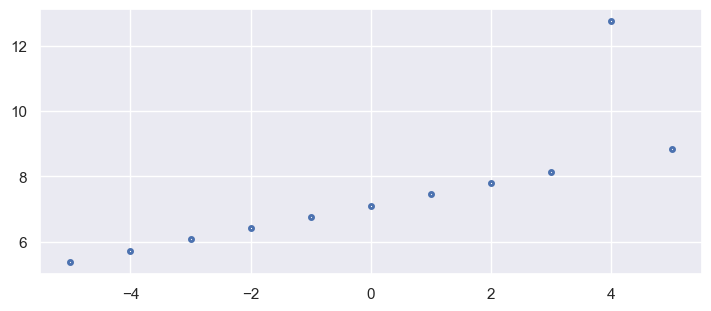

In [47]:
data = pd.read_csv('data/anscombe.csv')

#by x_3 and y_3 we denote the explanatory and response variable for the Anscombe data set.
#The 3 refers to the fact that this is the third example within the original paper by Anscombe.
x = np.array(data[data.group == 'III']['x'].values)
y  = np.array(data[data.group == 'III']['y'].values)

#we  center X to have an effective sampling
x_c = (x - x.mean())
plt.plot(x_c, y, 'b.');

# Application

* We will fit the model using the recommended data-dependent priors, as there is no background information.


* We will fit the model using the Gaussian and the Student likelihood.

In [65]:
#implementation with data-dependent priors
#s_x is the standard deviation of the centered X
s_x = x_c.std()
s_y = y.std()

with pm.Model() as gaussian_model:
    #priors on intercept, slope and standard deviation of noise for standardized data
    alpha   = pm.Normal ('alpha', mu=0, sigma=2 * s_y)
    beta    = pm.Normal ('beta',   mu=0,  sigma= 2.5 * s_y / s_x)
    sigma   = pm.HalfNormal ('sigma', sigma= 1.5 * s_y)
    
    y_pred   = pm.Normal ('y_pred', mu= alpha + beta * x_c,  sigma=sigma, observed=y)    

    #the kwargs is needed to store the log_likelihood associated to each sample
    #https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/model_comparison.html
    gaussian_trace   = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


In [60]:
with pm.Model() as st_model:
    #notice the use of weakly, data-dependent prior for *standardized* data
    # st stands for Student
    alpha_st   = pm.Normal ('alpha_st', mu=0, sigma=2 * s_y)
    beta_st    = pm.Normal ('beta_st',   mu=0,  sigma=2.5 * s_y / s_x)
    sigma_st   = pm.HalfNormal ('sigma_st', sigma= s_y)
    y_pred_st  = pm.StudentT  ('y_pred_st', mu= alpha_st + beta_st * x_c,  sigma=sigma_st,  nu=4, observed=y)
    st_trace   = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_st, beta_st, sigma_st]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


In [66]:
# We are fitting a line to a perfectly aligned set of points, apart from the outlier.
#The gaussian model reports  a much larger uncertainty on the estimates and a higher estimate of beta to fit the outlier.
pd.concat( [az.summary(gaussian_trace), az.summary(st_trace)])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,7.391,0.454,6.535,8.261,0.008,0.006,3179.0,1781.0,1.0
beta,0.494,0.139,0.239,0.765,0.003,0.002,2862.0,1852.0,1.0
sigma,1.425,0.385,0.835,2.148,0.009,0.006,2019.0,2343.0,1.0
alpha_st,7.114,0.003,7.109,7.119,0.000,0.000,2363.0,1505.0,1.0
beta_st,0.345,0.001,0.344,0.347,0.000,0.000,2313.0,1280.0,1.0
sigma_st,0.007,0.005,0.002,0.014,0.000,0.000,978.0,1047.0,1.0


# Visualizing the models

In [67]:
# For simplicity, we compare the two models  using only  the mean estimate of the parameters without considering the other plausible values.
#By using all plausible values, we would see a large uncertainty for the Gaussian model.

#posterior mean of the parameters, robust model
post_st    = az.extract_dataset(st_trace)
a_st       = post_st.alpha_st.values.mean()
b_st       = post_st.beta_st.values.mean()

#posterior mean of the parameters, gaussian model
post_gauss  = az.extract_dataset(gaussian_trace)
a           = post_gauss.alpha.values.mean()
b           = post_gauss.beta.values.mean()

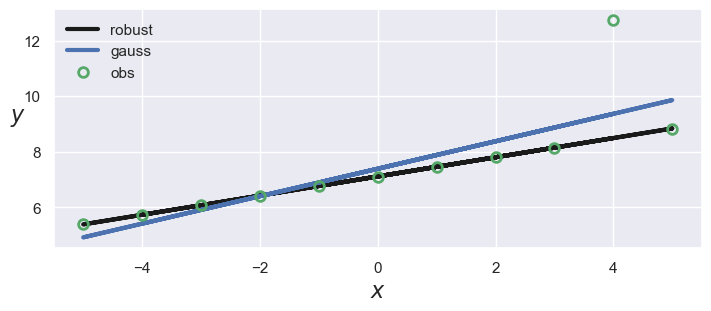

In [68]:
#The Student model perfectly fits the non-outliers 
plt.plot(x_c, a_st + b_st * x_c,  c='k', lw=3, label='robust')
plt.plot(x_c,  a+ b * x_c,  c='b', lw=3, label='gauss')
plt.plot(x_c, y, 'g.', markersize=14, label='obs')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend();

In [69]:
# we can also compare the models via WAIC

# the Student model is ranked first
compare_dict = {'gaussian':gaussian_trace, 'student': st_trace}
az.compare(compare_dict, ic='waic')

/Users/giorgio/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/giorgio/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
student,0,11.411530,7.052456,0.000000,0.908559,27.976709,0.000000,True,log
gaussian,1,-21.517184,4.232474,32.928715,0.091441,5.182689,22.823576,True,log


# Discussion

* The model with the Gaussian likelihood is affected by the outlier.


* The robust model automatically discards the outlier and fits the correct line. 


* The Student's t-distribution, due to its heavier tails, is able to give less importance to points that are far away from the bulk of the data, filtering outliers in an automatic way.

# Solutions

# A model of bike rides as a function of humidity


# Prior for the $\beta$ and $\alpha_c$


> For every one percentage point increase in humidity level, ridership tends to decrease by 10 rides, though the decrease could vary between 0 and 20.


$$ \beta  \sim N(-10, 5)  $$


>   On an average humidity day, there are typically around 5000 riders, the actual number varying between 1000 and 9000.

$$\alpha_c \sim N(5000, 2000)$$


# Prior for $\sigma$

> Ridership is only weakly related to humidity. At any given humidity, ridership will tend to vary with a large standard deviation of 2000 rides.

* We can  set:

$$ \sigma  \sim \text{HalfNormal} (3000), $$
whose  median is around 2000.

In [70]:
#obtained by trial and error
from scipy.stats import halfnorm 
pd.DataFrame(halfnorm.rvs(scale=3000, size=10000)).describe()


,0
count,10000.000000
mean,2368.141342
std,1820.671626
min,0.584669
25%,930.428145
50%,1969.435381
75%,3408.063384
max,14363.757662


# The resulting model (bike rides as a function of humidity)


\begin{align*}
\alpha_c & \sim  N (5000, 2000) \\
\beta & \sim N(-10, 5) \\
\sigma & \sim \text{HalfNormal} (3000)\\ 
Y & \sim N( \alpha_c + \beta X_c, \sigma)
\end{align*}

In [71]:
#solution of the likelihood exercise

from scipy.stats import norm

x = np.array([1,5])
y = np.array([11,50])
beta = 10
alpha = 2
sigma = 1

#vector
mu = alpha + beta * x

#lik of each observation
#syntax: norm.pdf(value whose lik is to be computed, mean, standard deviation)
lik_vector = norm.pdf(y, mu, sigma)

#likelihood for both data points
lik = np.prod(lik_vector)

#to have a numerically stable approach, usually the log-likelihood is considered rather than the likelihood.
print(lik_vector)
print(lik)

[0.24197072 0.05399097]
0.013064233284684923
